# Linear regressions in TensorFlow

## Simple linear regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/Users/sebastia.agramunt/anaconda/envs/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
# Parameters
learning_rate = 0.02 #how fast our model learns
training_epochs = 2000 #number of epochs (1 epoch is one pass to all the data)
display_step = 100 

In [3]:
#generate data for linear regression
x_data = np.arange(0,10,0.5)
y_data = np.array([np.random.normal(x) for x in x_data])

In [4]:
#placeholders 
#tf.placeholder(
#    dtype,
#    shape=None,
#    name=None
#)
#Its value must be fed using the feed_dict optional argument to Session.run(), Tensor.eval(), or Operation.run()
#we use placeholders to input the data

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [5]:
#variables
#tf.Variable(<initial-value>, name=<optional-name>)
#variables will change during the process of backpropagation

W = tf.Variable(np.random.randn(),name = "omega")
b = tf.Variable(np.random.randn(),name = "bias")

In [6]:
#This is the prediction of y
Y_pred = tf.add(tf.multiply(W,X),b)

#and the cost
#cost = tf.reduce_mean(tf.pow(Y-Y_pred,2))
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/(2*x_data.shape[0])

In [7]:
to_optimize = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch: 100, cost = 0.458724082, w = 1.113970160484314, b = -0.5291939377784729
Epoch: 200, cost = 0.392081022, w = 1.0625447034835815, b = -0.17399238049983978
Epoch: 300, cost = 0.368854344, w = 1.032220721244812, b = 0.03545903041958809
Epoch: 400, cost = 0.360746235, w = 1.014339566230774, b = 0.1589663177728653
Epoch: 500, cost = 0.357908130, w = 1.0037957429885864, b = 0.23179461061954498
Epoch: 600, cost = 0.356910139, w = 0.9975781440734863, b = 0.2747398018836975
Epoch: 700, cost = 0.356556654, w = 0.9939121007919312, b = 0.30006280541419983
Epoch: 800, cost = 0.356429905, w = 0.9917502403259277, b = 0.31499430537223816
Epoch: 900, cost = 0.356383473, w = 0.9904753565788269, b = 0.3237997889518738
Epoch: 1000, cost = 0.356365979, w = 0.9897236824035645, b = 0.32899194955825806
Epoch: 1100, cost = 0.356359124, w = 0.9892804622650146, b = 0.3320539593696594
Epoch: 1200, cost = 0.356356293, w = 0.989018976688385, b = 0.3338591754436493
Epoch: 1300, cost = 0.356355011, w = 0.988864

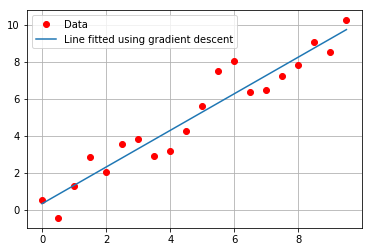

In [8]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(x_data, y_data):
            sess.run(to_optimize, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: x_data, Y: y_data})
            print("Epoch: {}, cost = {:.9f}, w = {}, b = {}".format(epoch+1,c,sess.run(W),sess.run(b)))

    training_cost = sess.run(cost, feed_dict={X: x_data, Y: y_data})
    #Graphic display
    plt.plot(x_data, y_data, 'ro', label='Data')
    plt.plot(x_data, sess.run(W) * x_data + sess.run(b), label='Line fitted using gradient descent')
    plt.legend()
    plt.grid()
    plt.show()

We can find the exact solution (this is a convex problem) using linear algebra. This can be calculated using the stats module from the scipy package

In [9]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data,y_data)
print("Slope is {}".format(slope))
print("Intercept is {}".format(intercept))
print("r_value is {}".format(r_value))
print("p_value is {}".format(p_value))

Slope is 0.99043388170828
Intercept is 0.3368667395273137
r_value is 0.9589748997879189
p_value is 2.6933635699173578e-11


The slope and the intercept are very similar, our calculated solution is quite good.

## Polinomial linear regression

We'll try to fit a polinomial

\begin{eqnarray}
y(x) &=& a_0+a_1x+a_2x^2 \\
y(x) &=& 1+3x+2x^2
\end{eqnarray}

In [40]:
#generate data for linear regression
#function to be fitted
a0 = 1
a1 = 3
a2 = 2

def polynomial2(x,a0=a0,a1=a1,a2=a2):
    return a2*np.power(x,2.0)+a1*x+a0

x_data = np.arange(0,5,0.1)
y_data = np.array([np.random.normal(polynomial2(x)) for x in x_data])
x_features = np.array([[1.0,x,np.power(x,2.0)] for x in x_data])#.reshape(3,-1)

In [41]:
X = tf.placeholder(tf.float32,shape = (1,3))
W = tf.Variable(tf.truncated_normal((3, 1)))

Y_pred = tf.matmul(X,W)
cost = tf.reduce_sum(tf.pow(Y_pred-Y, 2))/(2*x_features.shape[0])
to_optimize = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [42]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(x_features,y_data):
            x = x.reshape(1,3)
            sess.run(to_optimize,feed_dict={Y : y,X : x})
        if (epoch+1) % display_step == 0:
            c = sess.run(cost,feed_dict={Y : y,X : x})
            print("Epoch: {}, cost = {:.9f}, w0 = {}, w1 = {}, w2 = {}".format(epoch+1,
                                                                               c,
                                                                               sess.run(W)[0],
                                                                               sess.run(W)[1],
                                                                               sess.run(W)[2]))

Epoch: 100, cost = 0.004426220, w0 = [ 1.06577313], w1 = [ 2.5443821], w2 = [ 2.10914373]
Epoch: 200, cost = 0.002195192, w0 = [ 1.41264808], w1 = [ 2.7997272], w2 = [ 2.03438973]
Epoch: 300, cost = 0.001903596, w0 = [ 1.50930631], w1 = [ 2.8218267], w2 = [ 2.02451181]
Epoch: 400, cost = 0.001893855, w0 = [ 1.55387437], w1 = [ 2.8022356], w2 = [ 2.02660728]
Epoch: 500, cost = 0.001931123, w0 = [ 1.58513713], w1 = [ 2.77755308], w2 = [ 2.03051972]
Epoch: 600, cost = 0.001972921, w0 = [ 1.61100185], w1 = [ 2.75449848], w2 = [ 2.03434467]
Epoch: 700, cost = 0.002011742, w0 = [ 1.63334739], w1 = [ 2.73403311], w2 = [ 2.0377717]
Epoch: 800, cost = 0.002046314, w0 = [ 1.65284908], w1 = [ 2.71607566], w2 = [ 2.04078412]
Epoch: 900, cost = 0.002076868, w0 = [ 1.66989589], w1 = [ 2.70036077], w2 = [ 2.04342127]
Epoch: 1000, cost = 0.002103761, w0 = [ 1.68481088], w1 = [ 2.68660331], w2 = [ 2.04573035]
Epoch: 1100, cost = 0.002127483, w0 = [ 1.69786954], w1 = [ 2.67455173], w2 = [ 2.04775333]
Ep

Now we'll calculate the exact analytical solution for this multilinear regression. For this we don't need to feed the intercept term, we'll calculate x_features2.

In [14]:
x_features2 = [x[1:] for x in x_features]

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_features2,y_data)
print("Coefficients: a1,a2\n")
print(lr.coef_)

print("Intercept: a0\n")
print(lr.intercept_)

Coefficients: a1,a2

[ 3.32020452  1.94240316]
Intercept: a0

0.893921065853


In [16]:
y_pred_sklearn = lr.predict(x_features2)

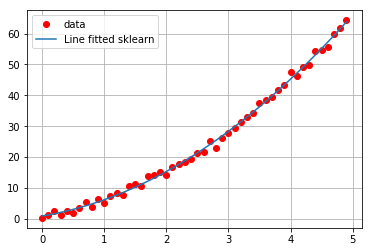

In [17]:
plt.clf()
plt.plot(x_data,y_data,'ro',label="data")
plt.plot(x_data, y_pred_sklearn, label='Line fitted sklearn')
#plt.plot(x_data, y_pred_tf[0], label='Line fitted gradient descent')
plt.grid()
plt.legend()
plt.show()

In [29]:
a = np.zeros((3,3))
ta = tf.convert_to_tensor(a)

In [32]:
help(tf.convert_to_tensor)

Help on function convert_to_tensor in module tensorflow.python.framework.ops:

convert_to_tensor(value, dtype=None, name=None, preferred_dtype=None)
    Converts the given `value` to a `Tensor`.
    
    This function converts Python objects of various types to `Tensor`
    objects. It accepts `Tensor` objects, numpy arrays, Python lists,
    and Python scalars. For example:
    
    ```python
    import numpy as np
    
    def my_func(arg):
      arg = tf.convert_to_tensor(arg, dtype=tf.float32)
      return tf.matmul(arg, arg) + arg
    
    # The following calls are equivalent.
    value_1 = my_func(tf.constant([[1.0, 2.0], [3.0, 4.0]]))
    value_2 = my_func([[1.0, 2.0], [3.0, 4.0]])
    value_3 = my_func(np.array([[1.0, 2.0], [3.0, 4.0]], dtype=np.float32))
    ```
    
    This function can be useful when composing a new operation in Python
    (such as `my_func` in the example above). All standard Python op
    constructors apply this function to each of their Tensor-valued
   